In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
# замените на своё имя файла, если другое
data = pd.read_csv("df_with_nan.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,8.3252,41.0,6.984127,1.023810,322,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565,2.181467,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20629 non-null  float64
 1   HouseAge    20629 non-null  float64
 2   AveRooms    20625 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Target      20640 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20629.000000  20629.000000  20625.000000  20640.000000  20640.000000   
mean       3.870444     28.627660      5.428796      1.096675   1425.476744   
std        1.899760     12.578343      2.474629      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563700     18.000000      4.440909      1.006079    787.0000

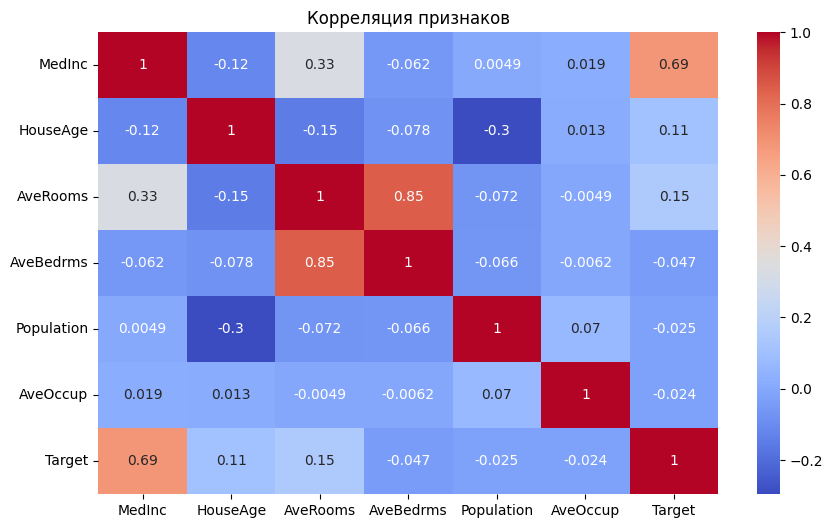

In [2]:
# Первичный анализ данных
print(data.info())
print(data.describe())
print("\nКоличество пропусков:")
print(data.isnull().sum())

# Корреляции
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляция признаков")
plt.show()

In [3]:
# Разделение на признаки и целевой признак
X = data.drop(columns=["Target"])
y = data["Target"]

# Тренировочный и тестовый сплит
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# --- Вариант 1: удаление строк с пропусками ---
X_train_dropna = X_train.dropna()
y_train_dropna = y_train.loc[X_train_dropna.index]

y_test_dropna = y_test.loc[X_test.dropna().index]
X_test_dropna = X_test.loc[y_test_dropna.index]

# --- Вариант 2: заполнение медианой ---
X_train_impute = X_train.copy()
X_test_impute = X_test.copy()
for col in X_train.columns:
    median_val = X_train[col].median()
    X_train_impute[col] = X_train[col].fillna(median_val)
    X_test_impute[col] = X_test[col].fillna(median_val)

In [5]:
# --- Модель на данных без пропусков ---
model_dropna = LinearRegression()
model_dropna.fit(X_train_dropna, y_train_dropna)
y_pred_dropna = model_dropna.predict(X_test_dropna)

# --- Модель на данных с импутацией ---
model_impute = LinearRegression()
model_impute.fit(X_train_impute, y_train)
y_pred_impute = model_impute.predict(X_test_impute)

In [6]:
mse_dropna = mean_squared_error(y_test_dropna, y_pred_dropna)
r2_dropna = r2_score(y_test_dropna, y_pred_dropna)

mse_impute = mean_squared_error(y_test, y_pred_impute)
r2_impute = r2_score(y_test, y_pred_impute)

print("Модель с удалением пропусков:")
print(f"MSE: {mse_dropna:.4f}")
print(f"R2: {r2_dropna:.4f}")

print("\nМодель с импутацией медианой:")
print(f"MSE: {mse_impute:.4f}")
print(f"R2: {r2_impute:.4f}")

if r2_impute > r2_dropna:
    print("\nЛучшая модель — с заполнением пропусков медианой.")
else:
    print("\nЛучшая модель — с удалением строк с пропусками.")

Модель с удалением пропусков:
MSE: 0.6171
R2: 0.5303

Модель с импутацией медианой:
MSE: 0.6167
R2: 0.5301

Лучшая модель — с удалением строк с пропусками.
